In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
user_details = pd.read_csv("C:/Users/Karthick/Downloads/user_details.csv")
cooking_sessions = pd.read_csv("C:/Users/Karthick/Downloads/cooking_sessions.csv")
order_details = pd.read_csv("C:/Users/Karthick/Downloads/order_details.csv")

In [3]:
print("cooking_sessions Columns:", cooking_sessions.columns)
print("User_Details Columns:", user_details.columns)
print("order_details Columns:", order_details.columns)

cooking_sessions Columns: Index(['Session_ID', 'User_ID', 'Dish_Name', 'Meal_Type', 'Session_Start',
       'Session_End', 'Duration', 'Session_Rating'],
      dtype='object')
User_Details Columns: Index(['User_ID', 'User_Name', 'Age', 'Location', 'Registration_Date', 'Phone',
       'Email', 'Favorite_Meal', 'Total_Orders'],
      dtype='object')
order_details Columns: Index(['Order_ID', 'User_ID', 'Order_Date', 'Meal_Type', 'Dish_Name',
       'Order_Status', 'Amount', 'Time_of_Day', 'Rating', 'Session_ID'],
      dtype='object')


In [4]:
# 1. Data Cleaning
# Handle missing values in order details
order_details['Rating'].fillna(0, inplace=True)

In [5]:
# Validate and standardize formats
# Convert date columns to datetime format
user_details['Registration_Date'] = pd.to_datetime(user_details['Registration_Date'])
cooking_sessions['Session_Start'] = pd.to_datetime(cooking_sessions['Session_Start'])
cooking_sessions['Session_End'] = pd.to_datetime(cooking_sessions['Session_End'])
order_details['Order_Date'] = pd.to_datetime(order_details['Order_Date'])

C:\Users\Karthick\AppData\Local\Temp\ipykernel_16760\1156248883.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  user_details['Registration_Date'] = pd.to_datetime(user_details['Registration_Date'])


In [6]:
# Remove duplicates
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)

In [7]:
# 2. Data Merging
# Merge cooking sessions and order details on Session ID
sessions_orders = pd.merge(cooking_sessions, order_details, on='Session_ID', how='inner')

In [8]:
print("Sessions_Orders Columns:", sessions_orders.columns)
print("User_Details Columns:", user_details.columns)

Sessions_Orders Columns: Index(['Session_ID', 'User_ID_x', 'Dish_Name_x', 'Meal_Type_x',
       'Session_Start', 'Session_End', 'Duration', 'Session_Rating',
       'Order_ID', 'User_ID_y', 'Order_Date', 'Meal_Type_y', 'Dish_Name_y',
       'Order_Status', 'Amount', 'Time_of_Day', 'Rating'],
      dtype='object')
User_Details Columns: Index(['User_ID', 'User_Name', 'Age', 'Location', 'Registration_Date', 'Phone',
       'Email', 'Favorite_Meal', 'Total_Orders'],
      dtype='object')


In [9]:
# Rename User_ID_x to User_ID for clarity before merge
sessions_orders_cleaned = sessions_orders.rename(columns={"User_ID_x": "User_ID"})

In [10]:
# Merge datasets
merged_data = pd.merge(
    sessions_orders_cleaned,
    user_details,
    on="User_ID",
    how="inner"
)

In [11]:
# Drop duplicate User_ID_y and clean column names
merged_data = merged_data.drop(columns=["User_ID_y"])
merged_data.columns = merged_data.columns.str.replace("_x", "", regex=True)
merged_data.columns = merged_data.columns.str.replace("_y", "", regex=True)

In [12]:
# Display final merged DataFrame
print(merged_data.head())

  Session_ID User_ID        Dish_Name  Meal_Type       Session_Start  \
0       S001    U001        Spaghetti     Dinner 2024-01-12 19:00:00   
1       S004    U001         Pancakes  Breakfast 2024-02-12 07:30:00   
2       S009    U001  Grilled Chicken     Dinner 2024-05-12 19:00:00   
3       S002    U002     Caesar Salad      Lunch 2024-01-12 12:00:00   
4       S006    U002        Spaghetti     Dinner 2024-03-12 18:30:00   

          Session_End  Duration  Session_Rating  Order_ID Order_Date  ...  \
0 2024-01-12 19:30:00        30             4.5      1001 2024-01-12  ...   
1 2024-02-12 08:00:00        30             4.2      1004 2024-02-12  ...   
2 2024-05-12 19:40:00        40             4.9      1009 2024-05-12  ...   
3 2024-01-12 12:20:00        20             4.0      1002 2024-01-12  ...   
4 2024-03-12 19:00:00        30             4.3      1006 2024-03-12  ...   

  Time_of_Day Rating      User_Name  Age     Location  Registration_Date  \
0       Night    5.0  Alice 

In [13]:
# Merge the resulting dataset with user details on User ID
merged_data = pd.merge(sessions_orders_cleaned, user_details, on='User_ID', how='inner')

In [14]:
# Save the merged dataset to an Excel file
merged_data.to_excel('C:/Users/Karthick/Downloads/merged_data.xlsx', index=False)

In [15]:
# Load the CSV file into a DataFrame
file_path = "C:/Users/Karthick/Downloads/merged_data.xlsx"  # Replace 'your_file.csv' with your actual file path
data = pd.read_excel(file_path)

# Display the first few rows of the data to verify
print(data.head())


  Session_ID User_ID      Dish_Name_x Meal_Type_x       Session_Start  \
0       S001    U001        Spaghetti      Dinner 2024-01-12 19:00:00   
1       S004    U001         Pancakes   Breakfast 2024-02-12 07:30:00   
2       S009    U001  Grilled Chicken      Dinner 2024-05-12 19:00:00   
3       S002    U002     Caesar Salad       Lunch 2024-01-12 12:00:00   
4       S006    U002        Spaghetti      Dinner 2024-03-12 18:30:00   

          Session_End  Duration  Session_Rating  Order_ID User_ID_y  ...  \
0 2024-01-12 19:30:00        30             4.5      1001      U001  ...   
1 2024-02-12 08:00:00        30             4.2      1004      U001  ...   
2 2024-05-12 19:40:00        40             4.9      1009      U001  ...   
3 2024-01-12 12:20:00        20             4.0      1002      U002  ...   
4 2024-03-12 19:00:00        30             4.3      1006      U002  ...   

  Time_of_Day Rating      User_Name Age     Location Registration_Date  \
0       Night      5  Alice Jo

In [16]:
df = pd.DataFrame(data)

In [17]:
# Data Cleaning
# Convert 'Session_Start' and 'Session_End' to datetime
df['Session_Start'] = pd.to_datetime(df['Session_Start'])
df['Session_End'] = pd.to_datetime(df['Session_End'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [18]:
# Remove any duplicate rows (if any)
df.drop_duplicates(inplace=True)

In [19]:
# Merge the sessions and orders data along with the user information
merged_df = pd.merge(df[['Session_ID', 'User_ID', 'Dish_Name_x', 'Meal_Type_x', 'Session_Start', 'Session_End', 'Duration', 'Session_Rating']],
                     df[['Order_ID', 'User_ID_y', 'Order_Date', 'Meal_Type_y', 'Dish_Name_y', 'Order_Status', 'Amount', 'Time_of_Day', 'Rating']],
                     left_on='User_ID', right_on='User_ID_y', how='inner')

# Now merge with the user-related data
user_df = df[['User_ID', 'User_Name', 'Age', 'Location', 'Registration_Date', 'Phone', 'Email', 'Favorite_Meal', 'Total_Orders']]

# Merge the user data into the merged dataframe
final_merged_df = pd.merge(merged_df, user_df, on='User_ID', how='inner')

# Display the final merged dataframe
print(final_merged_df.head())

  Session_ID User_ID Dish_Name_x Meal_Type_x       Session_Start  \
0       S001    U001   Spaghetti      Dinner 2024-01-12 19:00:00   
1       S001    U001   Spaghetti      Dinner 2024-01-12 19:00:00   
2       S001    U001   Spaghetti      Dinner 2024-01-12 19:00:00   
3       S001    U001   Spaghetti      Dinner 2024-01-12 19:00:00   
4       S001    U001   Spaghetti      Dinner 2024-01-12 19:00:00   

          Session_End  Duration  Session_Rating  Order_ID User_ID_y  ...  \
0 2024-01-12 19:30:00        30             4.5      1001      U001  ...   
1 2024-01-12 19:30:00        30             4.5      1001      U001  ...   
2 2024-01-12 19:30:00        30             4.5      1001      U001  ...   
3 2024-01-12 19:30:00        30             4.5      1004      U001  ...   
4 2024-01-12 19:30:00        30             4.5      1004      U001  ...   

  Time_of_Day Rating      User_Name Age  Location Registration_Date  \
0       Night      5  Alice Johnson  28  New York        2023-0

In [20]:
# Relationship between cooking sessions and user orders
# Identify if each session corresponds to a completed order
final_merged_df['Session_Completed'] = final_merged_df['Order_Status'].apply(lambda x: 1 if x == 'Completed' else 0)

In [21]:
# Identify popular dishes
popular_dishes = final_merged_df.groupby('Dish_Name_y')['Order_ID'].count().reset_index().sort_values(by='Order_ID', ascending=False)
print(popular_dishes)

       Dish_Name_y  Order_ID
1  Grilled Chicken        23
4        Spaghetti        23
3         Pancakes        18
0     Caesar Salad        17
5    Veggie Burger        10
2          Oatmeal         9


In [22]:
# Check the column names
print(final_merged_df.columns)

Index(['Session_ID', 'User_ID', 'Dish_Name_x', 'Meal_Type_x', 'Session_Start',
       'Session_End', 'Duration', 'Session_Rating', 'Order_ID', 'User_ID_y',
       'Order_Date', 'Meal_Type_y', 'Dish_Name_y', 'Order_Status', 'Amount',
       'Time_of_Day', 'Rating', 'User_Name', 'Age', 'Location',
       'Registration_Date', 'Phone', 'Email', 'Favorite_Meal', 'Total_Orders',
       'Session_Completed'],
      dtype='object')


In [23]:
# Age vs Total Orders
age_orders = final_merged_df.groupby('Age')['Order_ID'].count().reset_index().sort_values(by='Order_ID', ascending=False)

# Location vs Total Orders
location_orders = final_merged_df.groupby('Location')['Order_ID'].count().reset_index().sort_values(by='Order_ID', ascending=False)

# Favorite Meal vs Total Orders
favorite_meal_orders = final_merged_df.groupby('Favorite_Meal')['Order_ID'].count().reset_index().sort_values(by='Order_ID', ascending=False)

# Display the results
print("Total Orders by Age:")
print(age_orders)

print("\nTotal Orders by Location:")
print(location_orders)

print("\nTotal Orders by Favorite Meal:")
print(favorite_meal_orders)

Total Orders by Age:
   Age  Order_ID
2   28        27
5   35        27
7   42        27
1   27         8
3   30         8
0   25         1
4   31         1
6   38         1

Total Orders by Location:
        Location  Order_ID
2        Chicago        27
3    Los Angeles        27
5       New York        27
6  San Francisco         8
7        Seattle         8
0         Austin         1
1         Boston         1
4          Miami         1

Total Orders by Favorite Meal:
  Favorite_Meal  Order_ID
1        Dinner        37
2         Lunch        35
0     Breakfast        28


C:\Users\Karthick\AppData\Local\Temp\ipykernel_16760\3752582912.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Age', y='Total_Orders', ci=None)


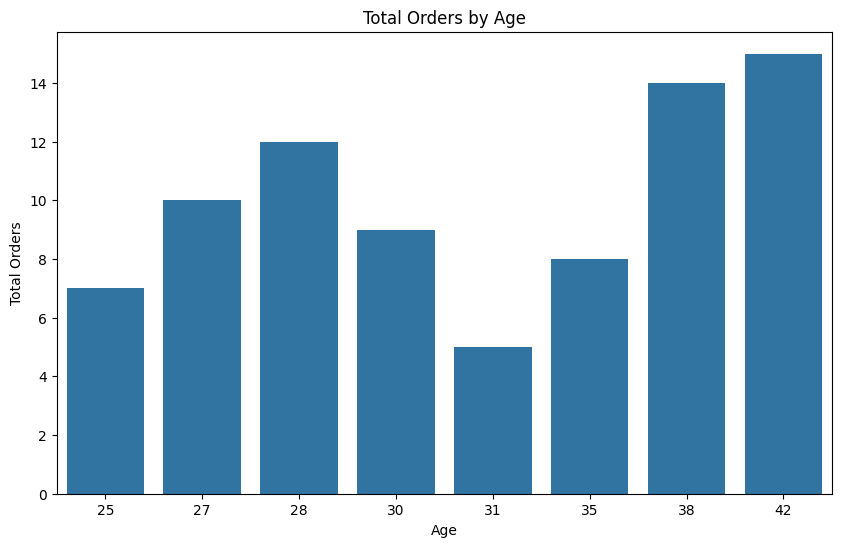

In [24]:
# Demographic analysis
# Age vs Total Orders
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Age', y='Total_Orders', ci=None)
plt.title("Total Orders by Age")
plt.xlabel('Age')
plt.ylabel('Total Orders')
plt.show()

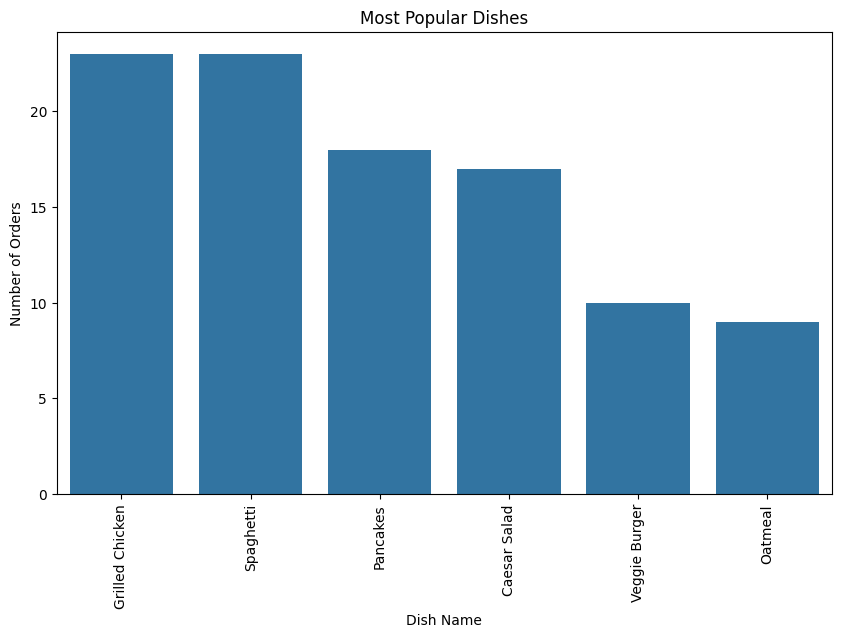

In [25]:
# Popular dishes visualization
plt.figure(figsize=(10,6))
sns.barplot(data=popular_dishes, x='Dish_Name_y', y='Order_ID')
plt.title("Most Popular Dishes")
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

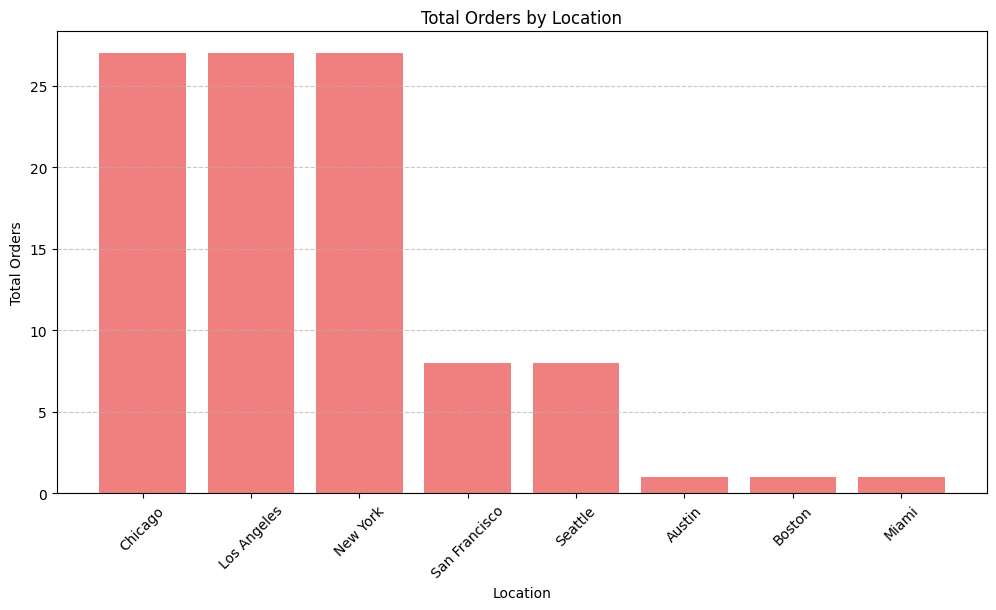

In [27]:
# Plot: Location vs Total Orders
plt.figure(figsize=(12, 6))
plt.bar(location_orders['Location'], location_orders['Order_ID'], color='lightcoral')
plt.title('Total Orders by Location')
plt.xlabel('Location')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

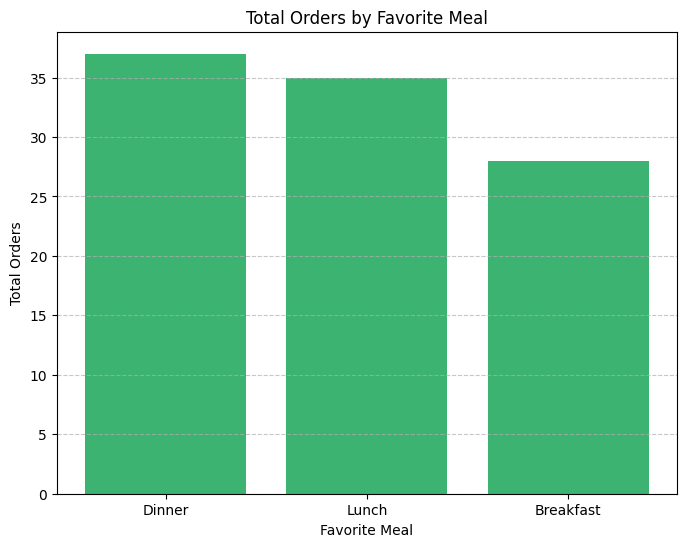

In [28]:
# Plot: Favorite Meal vs Total Orders
plt.figure(figsize=(8, 6))
plt.bar(favorite_meal_orders['Favorite_Meal'], favorite_meal_orders['Order_ID'], color='mediumseagreen')
plt.title('Total Orders by Favorite Meal')
plt.xlabel('Favorite Meal')
plt.ylabel('Total Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
# Output the cleaned and merged dataframe
print(final_merged_df.head())

  Session_ID User_ID Dish_Name_x Meal_Type_x       Session_Start  \
0       S001    U001   Spaghetti      Dinner 2024-01-12 19:00:00   
1       S001    U001   Spaghetti      Dinner 2024-01-12 19:00:00   
2       S001    U001   Spaghetti      Dinner 2024-01-12 19:00:00   
3       S001    U001   Spaghetti      Dinner 2024-01-12 19:00:00   
4       S001    U001   Spaghetti      Dinner 2024-01-12 19:00:00   

          Session_End  Duration  Session_Rating  Order_ID User_ID_y  ...  \
0 2024-01-12 19:30:00        30             4.5      1001      U001  ...   
1 2024-01-12 19:30:00        30             4.5      1001      U001  ...   
2 2024-01-12 19:30:00        30             4.5      1001      U001  ...   
3 2024-01-12 19:30:00        30             4.5      1004      U001  ...   
4 2024-01-12 19:30:00        30             4.5      1004      U001  ...   

  Rating      User_Name Age  Location  Registration_Date         Phone  \
0      5  Alice Johnson  28  New York         2023-01-15  12